<a href="https://colab.research.google.com/github/DataBytes-Organisation/Fine-Tuning-LLMs-for-Enterprise-Applications/blob/anjil/project-overview-document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [20]:
from datasets import load_dataset
import pandas as pd

import matplotlib.pyplot as plt

# Data expolaration

In [5]:
dataset = load_dataset("pubmed_qa", "pqa_labeled")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [6]:
# Print the shape of the dataset
print(dataset.shape)

# Check the first entry in the dataset
print(dataset['train'][0])

{'train': (1000, 5)}
{'pubid': 21645374, 'question': 'Do mitochondria play a role in remodelling lace plant leaves during programmed cell death?', 'context': {'contexts': ['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.', 'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage leaf (PCD is occurring) was divided into three areas based on the progression of PCD; cells that will not underg

In [10]:
print(dataset.keys())

dict_keys(['train'])


In [15]:
# Convert to pandas DataFrame for easier manipulation
train_df = pd.DataFrame(dataset['train'])
# valid_df = pd.DataFrame(dataset['validation'])
# test_df = pd.DataFrame(dataset['test'])

In [14]:
# Display basic information and first few entries
print(train_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pubid           1000 non-null   int64 
 1   question        1000 non-null   object
 2   context         1000 non-null   object
 3   long_answer     1000 non-null   object
 4   final_decision  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


In [13]:
print(train_df.head())

      pubid                                           question  \
0  21645374  Do mitochondria play a role in remodelling lac...   
1  16418930  Landolt C and snellen e acuity: differences in...   
2   9488747  Syncope during bathing in infants, a pediatric...   
3  17208539  Are the long-term results of the transanal pul...   
4  10808977  Can tailored interventions increase mammograph...   

                                             context  \
0  {'contexts': ['Programmed cell death (PCD) is ...   
1  {'contexts': ['Assessment of visual acuity dep...   
2  {'contexts': ['Apparent life-threatening event...   
3  {'contexts': ['The transanal endorectal pull-t...   
4  {'contexts': ['Telephone counseling and tailor...   

                                         long_answer final_decision  
0  Results depicted mitochondrial dynamics in viv...            yes  
1  Using the charts described, there was only a s...             no  
2  "Aquagenic maladies" could be a pediatric form...    

In [16]:
train_df.head()

,pubid,question,context,long_answer,final_decision
0,21645374,Do mitochondria play a role in remodelling lac...,{'contexts': ['Programmed cell death (PCD) is ...,Results depicted mitochondrial dynamics in viv...,yes
1,16418930,Landolt C and snellen e acuity: differences in...,{'contexts': ['Assessment of visual acuity dep...,"Using the charts described, there was only a s...",no
2,9488747,"Syncope during bathing in infants, a pediatric...",{'contexts': ['Apparent life-threatening event...,"""Aquagenic maladies"" could be a pediatric form...",yes
3,17208539,Are the long-term results of the transanal pul...,{'contexts': ['The transanal endorectal pull-t...,Our long-term study showed significantly bette...,no
4,10808977,Can tailored interventions increase mammograph...,{'contexts': ['Telephone counseling and tailor...,The effects of the intervention were most pron...,yes


In [24]:
final_decision_distribution = train_df['final_decision'].value_counts()
print("Distribution of Final Decisions in Training Set:")
print(final_decision_distribution)

Distribution of Final Decisions in Training Set:
final_decision
yes      552
no       338
maybe    110
Name: count, dtype: int64


In [19]:
# Calculate the average length of long answers
train_df['long_answer_len'] = train_df['long_answer'].apply(len)
average_long_answer_length = train_df['long_answer_len'].mean()
print(f"Average Long Answer Length: {average_long_answer_length} characters")

Average Long Answer Length: 268.366 characters


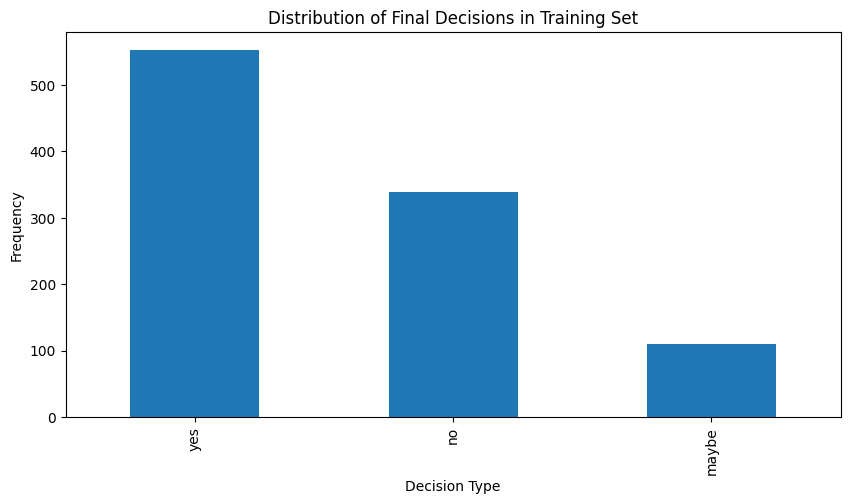

In [25]:
plt.figure(figsize=(10, 5))
final_decision_distribution.plot(kind='bar')
plt.title('Distribution of Final Decisions in Training Set')
plt.xlabel('Decision Type')
plt.ylabel('Frequency')
plt.show()